In [0]:
!pip3 install --upgrade torch torchvision googledrivedownloader

from IPython.display import clear_output
from google.colab import files
from random import randint
import nltk
import seaborn as sns
import numpy as np
import torch
from nltk.tokenize import RegexpTokenizer
from string import punctuation

tokenizer = RegexpTokenizer(r'\w+')
%load_ext autoreload
%autoreload 2
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')
pt_stop = nltk.corpus.stopwords.words('english')
pt_stop.append("<s>")
clear_output()

In [11]:
# Baixar os pesos do modelo pre treinado do InferSent ( se fossemos treinar demoraria mais de 1 dia )
!rm -rf infersent1.pkl
!rm -rf glove.840B.300d.zip
!curl -Lo infersent1.pkl https://s3.amazonaws.com/senteval/infersent/infersent1.pkl

# Baixar os embeddingss do GloVe e extrair
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1aVh7pYsiVovgTzeLDAdeLU2qpqtLXPTU', dest_path='./glove.840B.300d.txt', unzip=False)  

!unzip glove.840B.300d.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  37.4M      0  0:00:03  0:00:03 --:--:-- 37.4M
Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [12]:
# Classe modificada pra facilitar a inferencia no modelo
!rm -rf InferSentClass.py
!wget https://raw.githubusercontent.com/marcoaleixo/aisummit/master/InferSentClass.py
from InferSentClass import InferSent


MODEL_PATH =  'infersent1.pkl'

# Hiperparametros citados no paper
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}

model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

--2018-10-15 18:43:06--  https://raw.githubusercontent.com/marcoaleixo/aisummit/master/InferSentClass.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33982 (33K) [text/plain]
Saving to: ‘InferSentClass.py’

InferSentClass.py   100%[===================>]  33.19K  --.-KB/s    in 0.009s  

2018-10-15 18:43:07 (3.54 MB/s) - ‘InferSentClass.py’ saved [33982/33982]



In [0]:
model.set_w2v_path('glove.840B.300d.txt')

In [14]:
# Carregando os embeddings no modelo
model.build_vocab_k_words(K=100000)

Vocab size : 100000


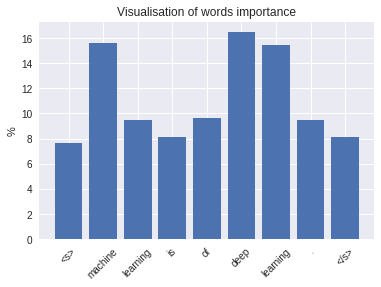

(tensor([[ 0.0357,  0.1055, -0.0027,  ..., -0.0149, -0.0381,  0.0526]],
        grad_fn=<MaxBackward0>), array([[3, 4, 7, ..., 6, 8, 2]]))

In [15]:
input = 'machine learning is subfield of deep learning.'

# Grafico da importancia de cada palavra.
model.visualize(input)

In [22]:
# Gera o vetor que representa a frase
model.encode(input, tokenize=True)

array([[ 0.02408349, -0.03946692, -0.03044511, ..., -0.03055104,
        -0.03814263, -0.02892261],
       [ 0.0024533 , -0.01888101, -0.00417832, ..., -0.02155335,
        -0.03814263, -0.02892261],
       [ 0.02491982, -0.01791508, -0.03044511, ..., -0.03926747,
        -0.03814263,  0.03790347],
       ...,
       [ 0.05712789, -0.08939895, -0.03044511, ..., -0.02854737,
        -0.03814263, -0.02892261],
       [ 0.00894748,  0.02972344, -0.03044511, ...,  0.00111258,
        -0.03814263,  0.00537444],
       [ 0.01152656, -0.08591913,  0.00797681, ..., -0.03926747,
        -0.03814263, -0.02892261]], dtype=float32)